# Exploratory Data Analysis (EDA)

   

<h2> Steps in EDA : <h2>
    1.Understandiing the Data.<br>
    2.Clean the Data.<br>
    3.Analysis of Relationship between variables.<br>

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv("Restaurants (1).csv")

1.Understandiing the Data

In [100]:
data.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


Sales: Sales of the restaurant in that year<br>
Units: Number of branches in the US<br>
Segment Category: Menu/Cuisine of the restaurant<br>
YoY Sales: Year on Year sales increase in % <br>
YoY Units: Year on Year increase in branches in %<br>


In [101]:
data.tail()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
245,246,Rainforest Cafe,NaN,129,-10.4%,18,-5.3%,NaN,Varied Menu
246,247,PDQ,NaN,127,-5.5%,56,-11.1%,NaN,Chicken
247,248,Lupe Tortilla,NaN,127,12.1%,25,8.7%,NaN,Mexican
248,249,Cook-Out Restaurant,NaN,126,10.1%,270,7.1%,NaN,Burger
249,250,Jollibee,NaN,126,15.2%,40,11.1%,NaN,Chicken


In [102]:
data.shape

(250, 9)

In [103]:
data.columns

Index(['Rank', 'Restaurant', 'Content', 'Sales', 'YOY_Sales', 'Units',
       'YOY_Units', 'Headquarters', 'Segment_Category'],
      dtype='object')

In [104]:
data.nunique()

Rank                250
Restaurant          250
Content              33
Sales               203
YOY_Sales           172
Units               214
YOY_Units           140
Headquarters         39
Segment_Category     48
dtype: int64

In [105]:
data['Segment_Category'].unique()

array(['Quick Service & Burger', 'Quick Service & Coffee Cafe',
       'Quick Service & Chicken', 'Quick Service & Mexican',
       'Quick Service & Sandwich', 'Quick Service & Pizza',
       'Fast Casual & Bakery Cafe', 'Fast Casual & Mexican',
       'Casual Dining & Italian/Pizza', 'Casual Dining & Varied Menu',
       'Fast Casual & Asian/Noodle', 'Quick Service & Frozen Desserts',
       'Casual Dining & Sports Bar', 'Family Dining & Family Style',
       'Casual Dining & Steak', 'Casual Dining & Seafood',
       'Fast Casual & Sandwich', 'Fast Casual & Chicken',
       'Quick Service & Family Casual', 'Fast Casual & Burger',
       'Casual Dining & Asian', 'Quick Service & Snack', 'Steak',
       'Quick Service & Beverage', 'Sports Bar',
       'Quick Service & Seafood', 'Quick Service & Bakery Cafe',
       'Fast Casual & Pizza', 'Fine Dining & Steak', 'Mexican',
       'Varied Menu', 'Chicken', 'Italian/Pizza', 'Pizza', 'Seafood',
       'Frozen Desserts', 'Coffee Cafe', 'BBQ',

2.Cleaning the data

In [106]:
 data.isnull().sum()

Rank                  0
Restaurant            0
Content             217
Sales                 0
YOY_Sales             0
Units                 0
YOY_Units             0
Headquarters        198
Segment_Category      0
dtype: int64

In [107]:
res = data.drop(['Content','Headquarters'], axis=1)

In [108]:
res.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger


In [122]:
res['YOY_Sales']

0        4.9%
1        8.6%
2       13.0%
3        9.0%
4        2.7%
        ...  
245    -10.4%
246     -5.5%
247     12.1%
248     10.1%
249     15.2%
Name: YOY_Sales, Length: 250, dtype: object

In [123]:
res['YOY_Sales']=res['YOY_Sales'].replace('\%','',regex=True).astype(float)

In [124]:
res['YOY_Sales']

0       4.9
1       8.6
2      13.0
3       9.0
4       2.7
       ... 
245   -10.4
246    -5.5
247    12.1
248    10.1
249    15.2
Name: YOY_Sales, Length: 250, dtype: float64

In [125]:
res['YOY_Units']=res['YOY_Units'].replace('\%','',regex=True).astype(float)

In [126]:
res['YOY_Units']

0      -0.5
1       3.0
2       5.0
3       2.7
4       0.2
       ... 
245    -5.3
246   -11.1
247     8.7
248     7.1
249    11.1
Name: YOY_Units, Length: 250, dtype: float64

In [131]:
res.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
0,1,McDonald's,40412,4.9,13846,-0.5,Quick Service & Burger
1,2,Starbucks,21380,8.6,15049,3.0,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0,2470,5.0,Quick Service & Chicken
3,4,Taco Bell,11293,9.0,6766,2.7,Quick Service & Mexican
4,5,Burger King,10204,2.7,7346,0.2,Quick Service & Burger


3.Relationship Analysis

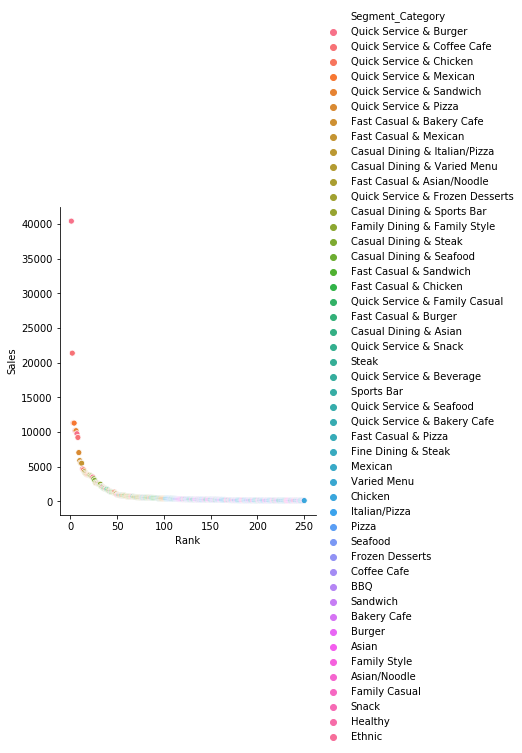

In [162]:
#Sales: Sales of the restaurant in that year
#Segment Category: Menu/Cuisine of the restaurant 
sns.relplot(x='Rank',y= 'Sales' ,hue ='Segment_Category',data=res)


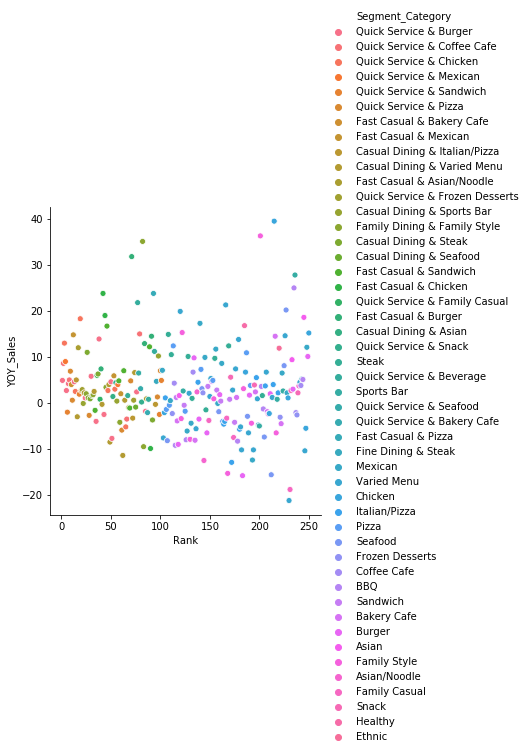

In [173]:
#YoY Sales: Year on Year sales increase in % 
#Segment Category: Menu/Cuisine of the restaurant
sns.relplot(x='Rank',y= 'YOY_Sales' ,hue ='Segment_Category',data=res)

In [164]:
#YoY Sales: Year on Year sales increase in % 
#Segment Category: Menu/Cuisine of the restaurant
data.groupby(['YOY_Sales','Segment_Category']).mean()

,,Rank,Sales,Units,YOY_Units
YOY_Sales,Segment_Category,,,,
-21.2,Varied Menu,230.0,143.0,45.0,-32.8
-18.8,Family Casual,231.0,142.0,49.0,-24.6
-15.8,Burger,183.0,185.0,138.0,-11.5
-15.6,Seafood,212.0,157.0,35.0,-14.6
-15.3,Family Style,168.0,210.0,160.0,-20.4
...,...,...,...,...,...
27.8,Sports Bar,236.0,133.0,33.0,37.5
31.8,Fast Casual & Burger,71.0,622.0,173.0,27.2
35.1,Family Dining & Family Style,82.0,558.0,368.0,24.7


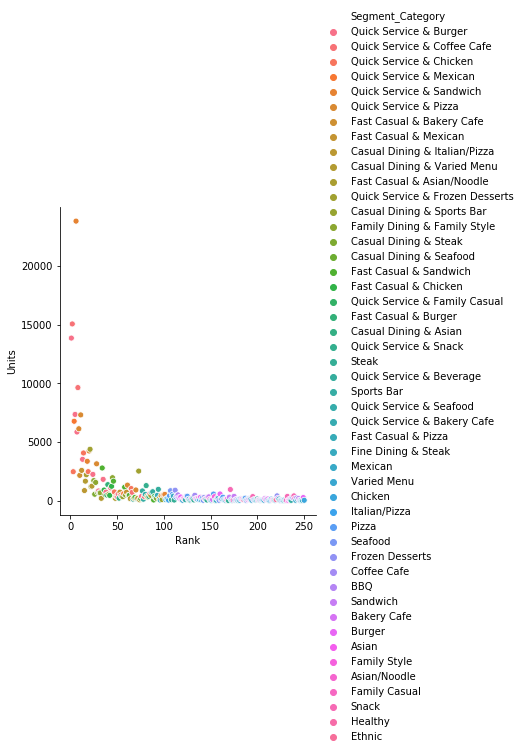

In [171]:
#Units: Number of branches in the US 
#Segment Category: Menu/Cuisine of the restaurant
sns.relplot(x='Rank',y= 'Units' ,hue ='Segment_Category',data=res)

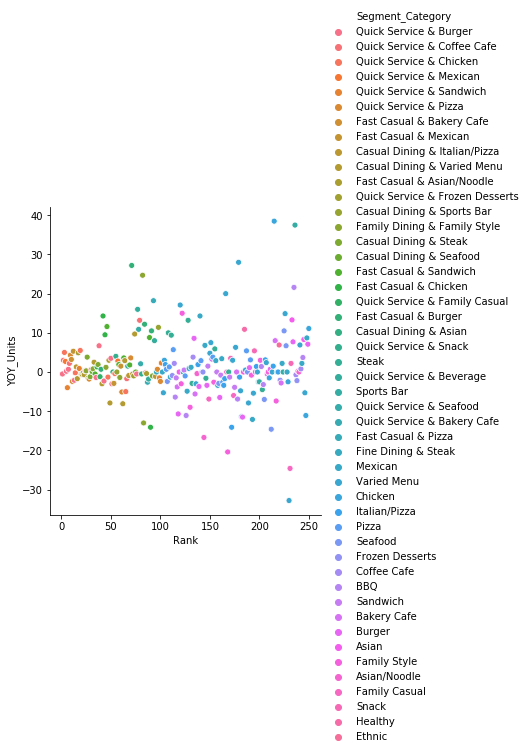

In [165]:
#YoY Units: Year on Year increase in branches in %
#Segment Category: Menu/Cuisine of the restaurant
sns.relplot(x='Rank',y= 'YOY_Units' ,hue ='Segment_Category',data=res)

In [166]:
#YoY Units: Year on Year increase in branches in %
#Segment Category: Menu/Cuisine of the restaurant
data.groupby(['YOY_Units','Segment_Category']).mean()

,,Rank,Sales,YOY_Sales,Units
YOY_Units,Segment_Category,,,,
-32.8,Varied Menu,230.0,143.0,-21.2,45.0
-24.6,Family Casual,231.0,142.0,-18.8,49.0
-20.4,Family Style,168.0,210.0,-15.3,160.0
-16.7,Asian/Noodle,144.0,268.0,-12.5,150.0
-14.6,Seafood,212.0,157.0,-15.6,35.0
...,...,...,...,...,...
24.7,Family Dining & Family Style,82.0,558.0,35.1,368.0
27.2,Fast Casual & Burger,71.0,622.0,31.8,173.0
28.0,Varied Menu,179.0,190.0,13.8,32.0


Text(0, 0.5, 'Year on Year increase in branches in %')

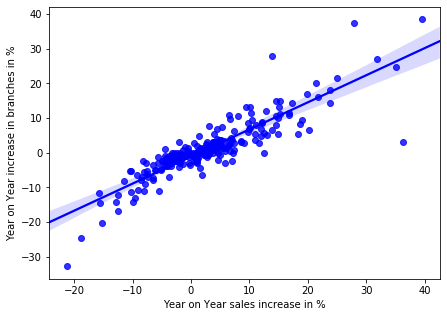

In [179]:
plt.figure(figsize = (7, 5))
sns.regplot(x = res['YOY_Sales'], y = data['YOY_Units'], color = 'blue')
plt.xlabel('Year on Year sales increase in %')
plt.ylabel('Year on Year increase in branches in %')

Text(0, 0.5, 'Number of branches in the US')

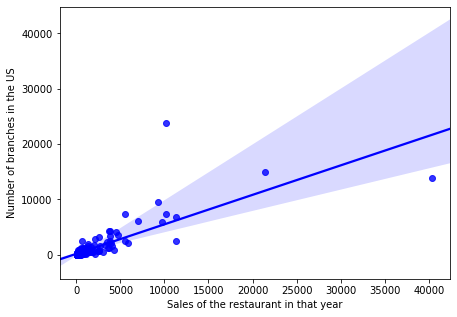

In [180]:
plt.figure(figsize = (7, 5))
sns.regplot(x = res['Sales'], y = data['Units'], color = 'blue')
plt.xlabel('Sales of the restaurant in that year')
plt.ylabel('Number of branches in the US')

In [167]:
#Units: Number of branches in the US    
#Restaurant: Name of the restaurant

data.groupby(['Units','Restaurant']).mean()

Rank  Sales  YOY_Sales  YOY_Units
Units Restaurant                                                              
13    Grand Lux Cafe                          213    157        1.2        0.0
16    Del Frisco's Double Eagle Steak House   169    205       12.4        0.0
      Ocean Prime                             227    144       20.2        6.7
17    Nobu                                    233    139        9.4       13.3
18    Mastro's Restaurants                    155    242        9.7        5.9
...                                           ...    ...        ...        ...
7346  Burger King                               5  10204        2.7        0.2
9630  Dunkin'                                   8   9228        5.0        2.2
13846 McDonald's                                1  40412        4.9       -0.5
15049 Starbucks                                 2  21380        8.6        3.0
23801 Subway                                    6  10200       -2.0       -4.0

[250 rows x 4 columns]

In [168]:
#Sales: Sales of the restaurant in that year
#Restaurant: Name of the restaurant
data.groupby(['Sales','Restaurant']).mean()

Rank  YOY_Sales  Units  YOY_Units
Sales Restaurant                                            
126   Cook-Out Restaurant   249       10.1    270        7.1
      Jollibee              250       15.2     40       11.1
127   Lupe Tortilla         248       12.1     25        8.7
      PDQ                   247       -5.5     56      -11.1
129   Biggby Coffee         242        3.8    240        0.8
...                         ...        ...    ...        ...
10204 Burger King             5        2.7   7346        0.2
11293 Taco Bell               4        9.0   6766        2.7
11320 Chick-fil-A             3       13.0   2470        5.0
21380 Starbucks               2        8.6  15049        3.0
40412 McDonald's              1        4.9  13846       -0.5

[250 rows x 4 columns]

In [181]:
#YoY Sales: Year on Year sales increase in % 
#Restaurant: Name of the restaurant
data.groupby(['YOY_Sales','Restaurant']).mean()

,,Rank,Sales,Units,YOY_Units
YOY_Sales,Restaurant,,,,
-21.2,Houlihan's,230,143,45,-32.8
-18.8,Old Country Buffet/HomeTown Buffet,231,142,49,-24.6
-15.8,Fuddruckers,183,185,138,-11.5
-15.6,McCormick & Schmick's,212,157,35,-14.6
-15.3,Friendly's,168,210,160,-20.4
...,...,...,...,...,...
27.8,Walk-On's Sports Bistreaux,236,133,33,37.5
31.8,Shake Shack,71,622,173,27.2
35.1,First Watch,82,558,368,24.7


In [170]:
#YoY Units: Year on Year increase in branches in %
#Restaurant: Name of the restaurant
data.groupby(['YOY_Units','Restaurant']).mean()

,,Rank,Sales,YOY_Sales,Units
YOY_Units,Restaurant,,,,
-32.8,Houlihan's,230,143,-21.2,45
-24.6,Old Country Buffet/HomeTown Buffet,231,142,-18.8,49
-20.4,Friendly's,168,210,-15.3,160
-16.7,Pei Wei Asian Diner,144,268,-12.5,150
-14.6,McCormick & Schmick's,212,157,-15.6,35
...,...,...,...,...,...
24.7,First Watch,82,558,35.1,368
27.2,Shake Shack,71,622,31.8,173
28.0,True Food Kitchen,179,190,13.8,32
